# E8-1 Hierarchical Clustering with Agnes and Diana

## The Agglomerative Algorithm
1. Make each data point a single point cluster.
2. Take two closest neighbour clusters and make them as one cluster. 
3. Take three closest clusters and make them as one cluster. 
4. Repeat step 3. until all points go in only one cluster.<br>

This is a bottom-up approach: __Aggromerative Hierarchical Clustering__<br>
It is possible to start top-down: __Divisible Hierrchical Clustering__

#### AGglomerative NESting vs DIvisible ANAlysis =  AGNES vs DIANA <br>


### Step 1: Imports

In [1]:
import numpy as np
import scipy.cluster.hierarchy as ch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt

### Step 2: Load the data

In [2]:
# Load input data
X = np.loadtxt('data_clustering.txt', delimiter=',')
print(X)

[[ 2.08  1.05]
 [ 2.05  7.7 ]
 [ 4.53  5.49]
 [ 6.23  1.02]
 [ 5.35  7.86]
 [ 2.88  0.79]
 [ 2.32  8.5 ]
 [ 5.06  5.65]
 [ 5.38  3.53]
 [ 6.31  9.73]
 [ 3.41  2.05]
 [ 1.75  7.38]
 [ 3.88  5.73]
 [ 7.22  2.88]
 [ 5.85  9.11]
 [ 3.66  2.38]
 [ 0.45  7.99]
 [ 6.01  5.83]
 [ 7.06  2.41]
 [ 7.47  8.97]
 [ 2.2   2.71]
 [ 2.94  8.71]
 [ 5.87  4.56]
 [ 4.57  1.33]
 [ 5.84  6.54]
 [ 3.4   1.  ]
 [ 1.44  8.26]
 [ 4.29  4.69]
 [ 8.09  1.99]
 [ 6.48  9.44]
 [ 2.94  1.78]
 [ 0.41  9.14]
 [ 5.42  4.08]
 [ 7.47  2.15]
 [ 5.62  7.65]
 [ 3.71  1.26]
 [ 0.41  8.9 ]
 [ 4.93  5.73]
 [ 7.23  0.14]
 [ 6.77  9.09]
 [ 3.23  2.64]
 [ 1.61  7.85]
 [ 4.7   4.78]
 [ 6.86  2.21]
 [ 5.2   9.65]
 [ 1.53  2.93]
 [ 0.27  9.38]
 [ 6.17  5.74]
 [ 8.47  2.44]
 [ 5.23  7.41]
 [ 3.27  1.63]
 [ 1.52  8.8 ]
 [ 5.49  4.5 ]
 [ 5.47  2.81]
 [ 5.43  7.45]
 [ 2.51  2.84]
 [ 2.07  7.67]
 [ 5.21  3.99]
 [ 7.05  3.  ]
 [ 6.09  9.39]
 [ 2.65  2.46]
 [ 3.18  8.62]
 [ 5.11  4.49]
 [ 7.87  1.69]
 [ 6.51  8.04]
 [ 2.72  1.67]
 [ 1.79  7

### Step 3: Preprocessing - Building Dendogram

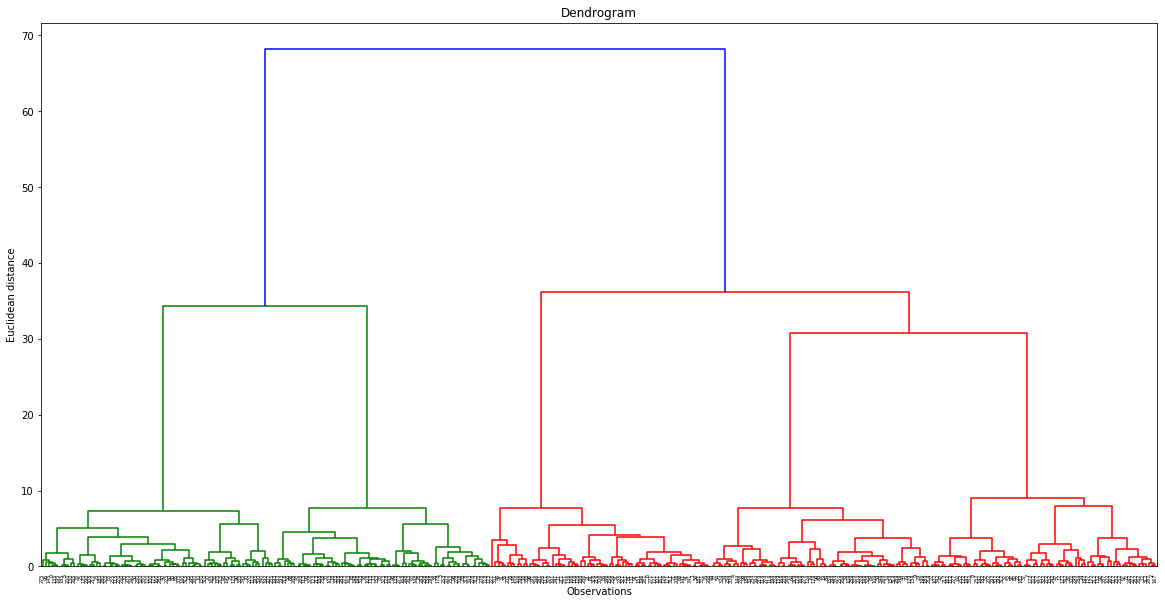

In [3]:
# Use dendogram to find the optimal number of clusters
plt.figure(figsize=(20,10))

# Linkage is a measure of dissimilarity of sets - distance between sets of observations 
# as a function of the pairwise distances between observations
dendogram = ch.dendrogram(ch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean distance')
plt.show()

### Step 4: Train the model

In [4]:
# linkage criterion searches for minimal distance between sets of observation
# ward minimizes the variance of the clusters being merged
n_clusters = 5
model = AgglomerativeClustering(n_clusters, affinity = 'euclidean', linkage = 'ward')
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [5]:
Y = model.fit_predict(X)
Y

array([3, 2, 0, 4, 1, 3, 2, 0, 0, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2,
       0, 3, 0, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4,
       1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3,
       2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 1, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0,
       4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1,
       3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2,
       0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4,
       1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3,
       2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 3, 4, 1, 3, 2, 0,
       4, 1, 3, 2, 0, 4, 1, 3, 2, 3, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1,
       3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2,
       0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4,
       1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 1, 0, 4, 1, 3, 2, 0, 4, 0, 3,
       2, 0, 4, 1, 3, 2, 0, 4, 1, 3, 2, 0, 4, 0, 3,

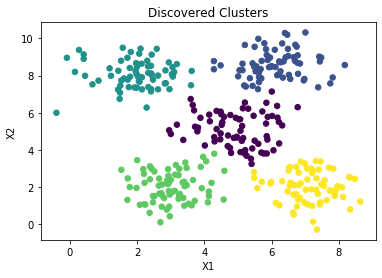

In [6]:
# Visualising the clusters
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap='viridis')
plt.title('Discovered Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## K-Means vs. Hierarchical Clustering
### K-Means Clustering
 #### Advantages
 > Simple to understand <br>
 > Easily adapptable and efficient<br>
 > Works well on both small and large datasets<br>
 
 #### Disadvantages
 > Need to know the optimal number of clusters in advance
 
### Hierarchical Clustering
 #### Advantages
 > The optimal number of clusters can be obtained from the model itself<br>
 > Dendograms are practical and easy to understand<br>
 
 #### Disadvantages
 > Not suitable for large datasets